# Importing the Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
#configuring API Key

quandl.ApiConfig.api_key = '720fb639130b52cb411116f359387b41'

In [4]:
#importing ammo data from FRED website
ammo = pd.read_csv(r'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis/02 Data/Original Data/ammo.csv',index_col = False)

In [5]:
path = '/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [6]:
#checking path
path

'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [7]:
#importing gun violence data
gunvc = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Data_cleaned_updated.csv'), index_col = False)

In [10]:
#checking dataframes
ammo.shape

(247, 2)

In [11]:
#checking dataframes
gunvc.shape

(239677, 26)

In [12]:
ammo.head()

,observation_date,PCU33299233299207
0,2002-06-01,100.0
1,2002-07-01,100.0
2,2002-08-01,100.0
3,2002-09-01,100.0
4,2002-10-01,100.0


In [13]:
gunvc.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,...,n_guns_involved,participant_age_group,participant_gender,participant_status,participant_type,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,0,1,1,1
1,1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1,1,1,1
2,2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,False,...,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,1,1,1,1
3,3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,0,1,1
4,4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,False,...,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,1,1,1


In [14]:
#changing the name to match that of the gunvc dataframe
ammo = ammo.rename(columns={'observation_date': 'date'})

In [15]:
#checking name change
ammo.head()

,date,PCU33299233299207
0,2002-06-01,100.0
1,2002-07-01,100.0
2,2002-08-01,100.0
3,2002-09-01,100.0
4,2002-10-01,100.0


In [16]:
ammo = ammo.rename(columns={'PCU33299233299207': 'Percussion Caps'})

In [17]:
ammo.head()

,date,Percussion Caps
0,2002-06-01,100.0
1,2002-07-01,100.0
2,2002-08-01,100.0
3,2002-09-01,100.0
4,2002-10-01,100.0


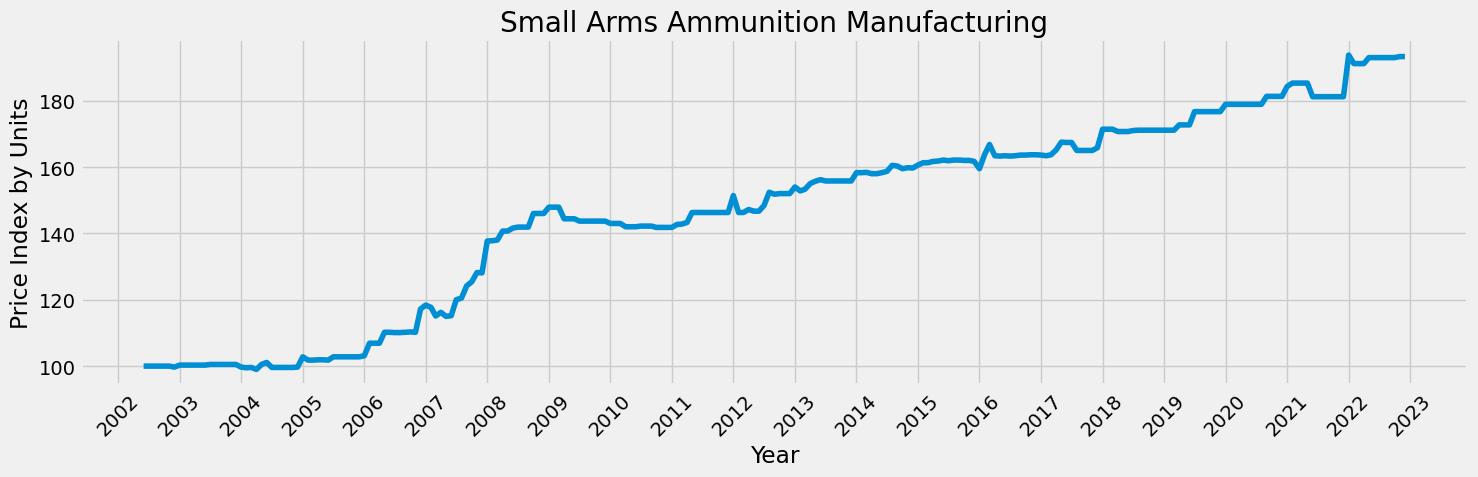

In [23]:
#plotting the data using matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure the date column is datetime
ammo['date'] = pd.to_datetime(ammo['date'])

plt.figure(figsize=(15,5), dpi=100)
plt.plot(ammo['date'], ammo['Percussion Caps'])

plt.title("Small Arms Ammunition Manufacturing")
plt.xlabel("Year")
plt.ylabel("Price Index by Units")

# Force ticks to appear every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())      # every 1 year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Prevent label overlap
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Subsetting, Wrangling and Cleaning Time-Series Data

In [24]:
#reset the index to use the date as a filter
ammo2 = ammo.reset_index()

In [25]:
ammo2.head()

,index,date,Percussion Caps
0,0,2002-06-01,100.0
1,1,2002-07-01,100.0
2,2,2002-08-01,100.0
3,3,2002-09-01,100.0
4,4,2002-10-01,100.0


3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example).

Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [27]:
ammo_subset = ammo2.loc[(ammo2['date'] >='2012-12-01') & (ammo2['date'] < '2022-12-01')]
                                                

In [28]:
#checking the dataframe
ammo_subset.shape

(120, 3)

In [31]:
#setting the date column as the index

ammo_subset['date'] = pd.to_datetime(ammo_subset['date'])
ammo_subset = ammo_subset.set_index('date')
ammo_subset.head()

,index,Percussion Caps
date,,
2012-12-01,126,152.0
2013-01-01,127,154.0
2013-02-01,128,152.8
2013-03-01,129,153.3
2013-04-01,130,155.0


# Creating a line Chart

4. Create a line chart of your data.

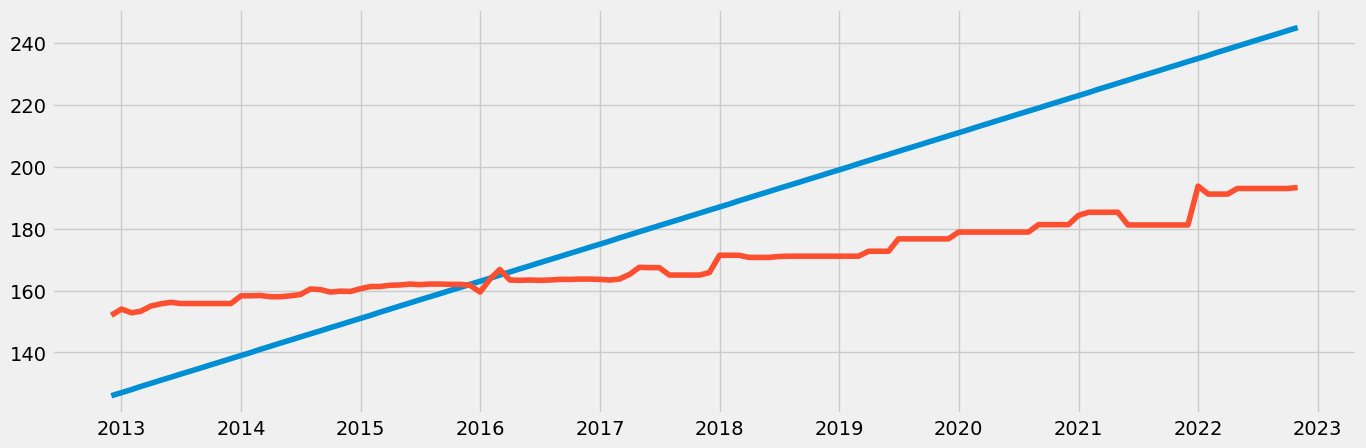

In [33]:
#plotting the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ammo_subset)

In [34]:
#checking for missing values
ammo_subset.isnull().sum()

index              0
Percussion Caps    0
dtype: int64

In [35]:
#checking for duplicates
dupes = ammo_subset.duplicated()
dupes.sum()

np.int64(0)

# Time-Series Analysis: Decomposition

5. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

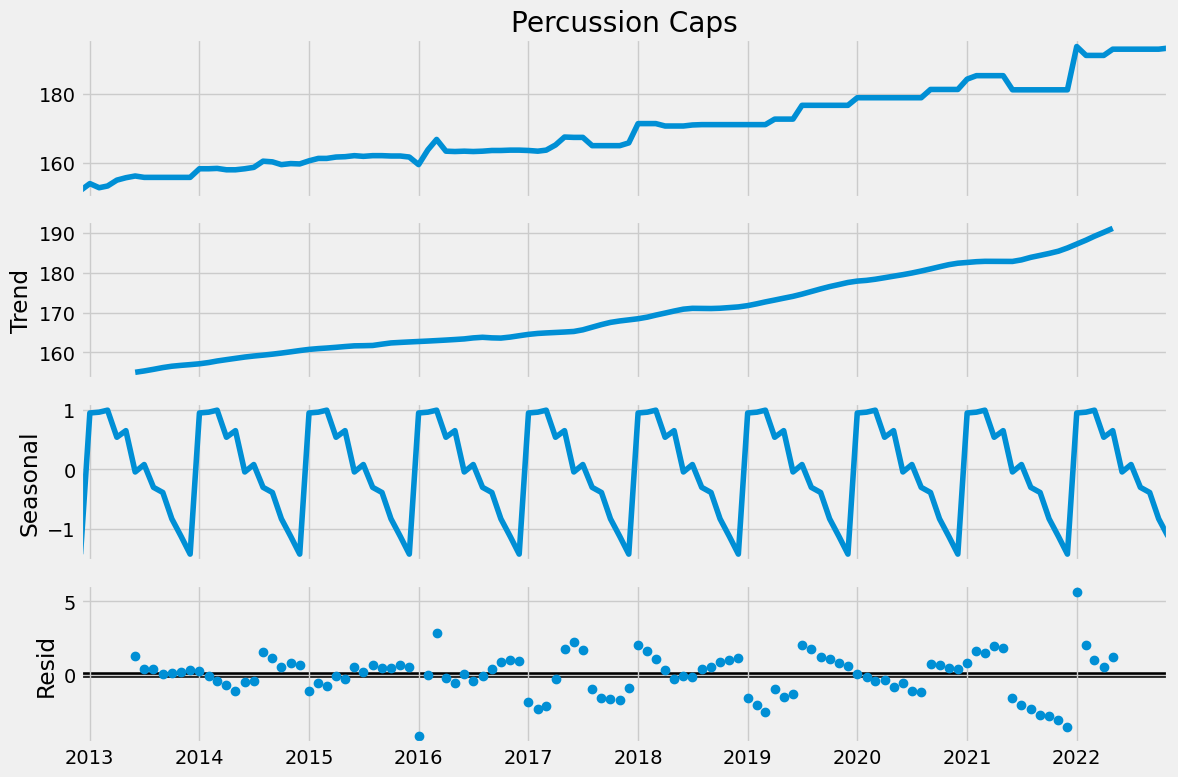

In [39]:
#decomposing the time series using the additive model approach

# Ensure the index is datetime (just in case)
ammo_subset.index = pd.to_datetime(ammo_subset.index)

# Force a monthly frequency
# MS = Month Start
ammo_subset = ammo_subset.asfreq("MS")   

# Decompose the "Percussion Caps" column
result = sm.tsa.seasonal_decompose(
    ammo_subset["Percussion Caps"],
    model="additive",
    period=12)

# Ploting the chart
fig = result.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()


# Testing for Stationarity

6. Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.




In [42]:
from statsmodels.tsa.stattools import adfuller

# Define the Dickey-Fuller function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    
    # Organizing the results
    result = pd.Series(
        test[0:4],
        index=[
            'Test Statistic',
            'p-value',
            'Number of Lags Used',
            'Number of Observations Used'])
    
    # Adding critical values
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    
    print(result)

# Running the test on the Percussion Caps column of the subset
dickey_fuller(ammo_subset['Percussion Caps'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.287333
p-value                          0.927279
Number of Lags Used              0.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


The percussion caps are not stationary. There is an upward trend.

# Conducting Round Differencing

In [43]:
#conducting a round differencing

ammo_subset['Percussion Caps_diff1'] = ammo_subset['Percussion Caps'].diff()
diff1 = ammo_subset['Percussion Caps_diff1'].dropna()

dickey_fuller(diff1)


Dickey-Fuller Stationarity test:
Test Statistic                -1.228390e+01
p-value                        8.107119e-23
Number of Lags Used            0.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64


Since the p-value is now far below 0.05 we can now reject the null hypothesis. the differenced series is now stationary.